## Bayesian inference with discrete priors

### Data model : Binomial
### Prior : discrete

### `목표` : 고객 설문 조사 후에 이전의 belief를 업데이트하자

#### Step 1. Prior Distribution

> 우리의 사전 믿음은 다음과 같다
>
> $\operatorname{Pr}(p=0.3) = 0.125, \operatorname{Pr}(p=0.4) = 0.125, \operatorname{Pr}(p=0.5) = 0.250$
> 
> $\operatorname{Pr}(p=0.6) = 0.250, \operatorname{Pr}(p=0.7) = 0.125, \operatorname{Pr}(p=0.8) = 0.125$

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


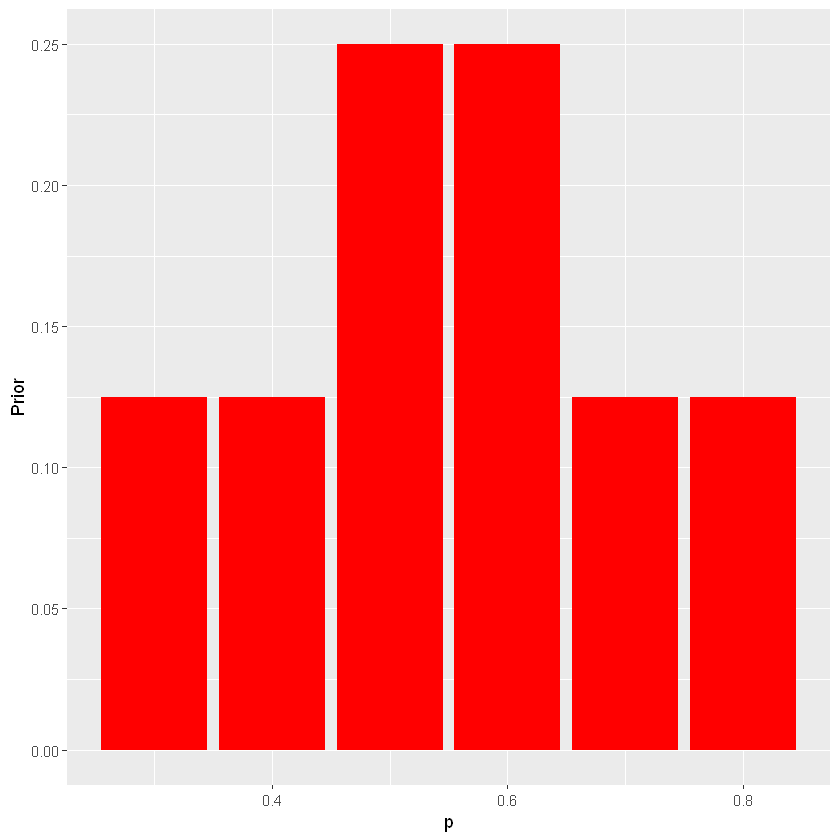

In [2]:
library(ggplot2)

bayes_table <- data.frame(p = seq(.3, .8, by=.1),
                           Prior = c(.125, .125, .250, .250, .125, .125))
ggplot(data=bayes_table, aes(x=p, y=Prior)) + geom_bar(stat='identity', fill='red')

### Step 2. Likelihood of proportion $p$

> 20명을 조사한 결과 12명이 금요일을 선호한다고 하였다.

In [5]:
# 각 p별로 likelihood를 계산하자
bayes_table$Likelihood <- dbinom(12, size=20, prob=bayes_table$p)
bayes_table

p,Prior,Likelihood
0.3,0.125,0.003859282
0.4,0.125,0.035497440
0.5,0.250,0.120134354
0.6,0.250,0.179705788
0.7,0.125,0.114396740
0.8,0.125,0.022160877


#### Step 3. Posterior distribution

> Bayes' rule for discrete version 을 활용하여 사전 믿음을 update하자
> > $ \pi\left(p_{i} | y\right)=\frac{\pi\left(p_{i}\right) \times L\left(p_{i}\right)}{\sum_{j} \pi\left(p_{j}\right) \times L\left(p_{j}\right)} $

In [7]:
# install.pakcage('TeachBayes')
library(TeachBayes)
bayes_table <- bayesian_crank(bayes_table)
bayes_table

Warning message:
"package 'TeachBayes' was built under R version 3.6.1"Loading required package: LearnBayes
Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.6.1"Loading required package: dplyr

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: shiny


p,Prior,Likelihood,Product,Posterior
0.3,0.125,0.003859282,0.0004824102,0.004975901
0.4,0.125,0.035497440,0.0044371799,0.045768032
0.5,0.250,0.120134354,0.0300335884,0.309786454
0.6,0.250,0.179705788,0.0449264469,0.463401326
0.7,0.125,0.114396740,0.0142995925,0.147495530
0.8,0.125,0.022160877,0.0027701096,0.028572757


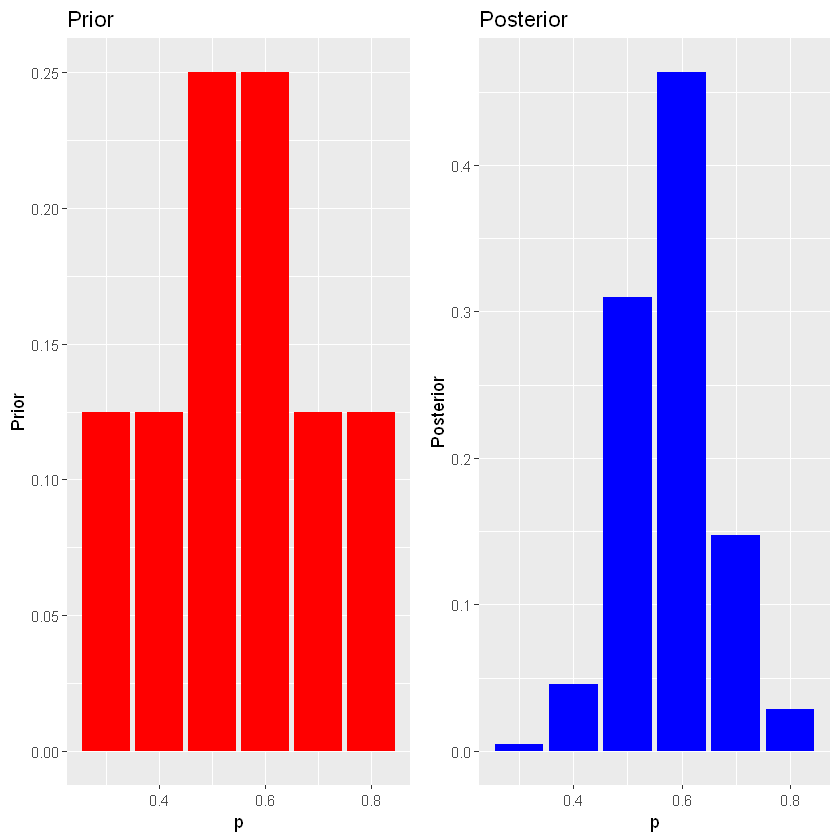

In [9]:
prior <- ggplot(data=bayes_table, aes(x=p, y=Prior)) +
    geom_bar(stat='identity', fill='red') + labs(title='Prior')

posterior <- ggplot(data=bayes_table, aes(x=p, y=Posterior)) +
    geom_bar(stat='identity', fill='blue') + labs(title='Posterior')

grid.arrange(prior, posterior, ncol=2)

## Bayesian inference with continuous prior

### Data model : Binomial
### Prior : Beta

### `목표` : 고객 설문 조사 후에 이전의 belief를 업데이트하자

#### Step 1. Prior Distribution

> 우리의 사전 믿음을 나타내는 Beta distribution의 parameter를 직접 결정하는 것은 어렵다.
>
> 2개의 percentile을 명시해서 결정하자!

`beta.select` 함수는 2개의 percentile을 인풋으로 넣었을 때, 이에 대응하는 Beta curve를 찾아준다.

> 우리의 사전 믿음은 다음과 같다 $\operatorname{Pr}_\text{< 0.5} = 0.55, \operatorname{Pr}_\text{< 0.9} = 0.8$

> *금요일에 오고 싶어하는 사람이 절반이 안될거라 0.55만큼 믿어*
>
> *금요일에 오고 싶어하는 사람이 90%가 안될거라 0.8만큼 믿어*

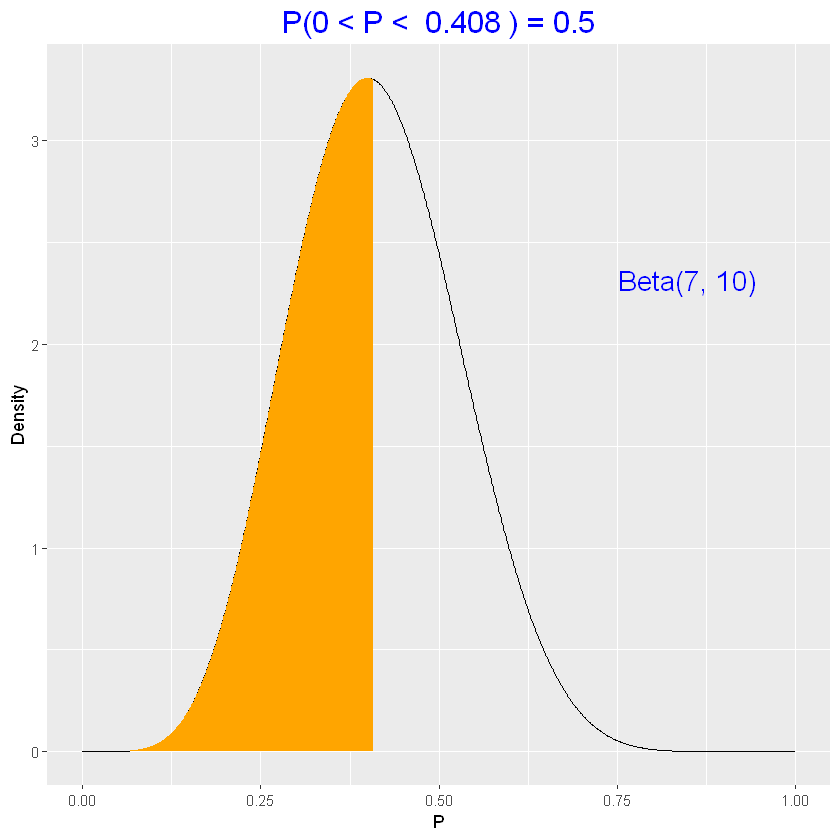

In [14]:
beta_quantile(0.5, c(7, 10))

In [12]:
beta.select(list(x=0.55, p=0.5), list(x=0.8, p=0.9))

[1] 3.06 2.56

### Step 2. Likelihood of proportion $p$

> 20명을 조사한 결과 12명이 금요일을 선호한다고 하였다.
>
> >$L(p)=\left(\begin{array}{l}{20} \\ {12}\end{array}\right) p^{12}(1-p)^{8}$

#### Step 3. Posterior distribution

> Bayes' rule for continuous version 을 활용하여 사전 믿음을 update하자
> > $ \pi\left(p | y\right)=\frac{\pi\left(p\right) \times L\left(p\right)}{\int \pi\left(p_{j}\right) \times L\left(p_{j}\right)dp_j} $
>
> > $\cdots$
>
> > $p|Y=y \sim \text{Beta}(a+y, b+n-y)$

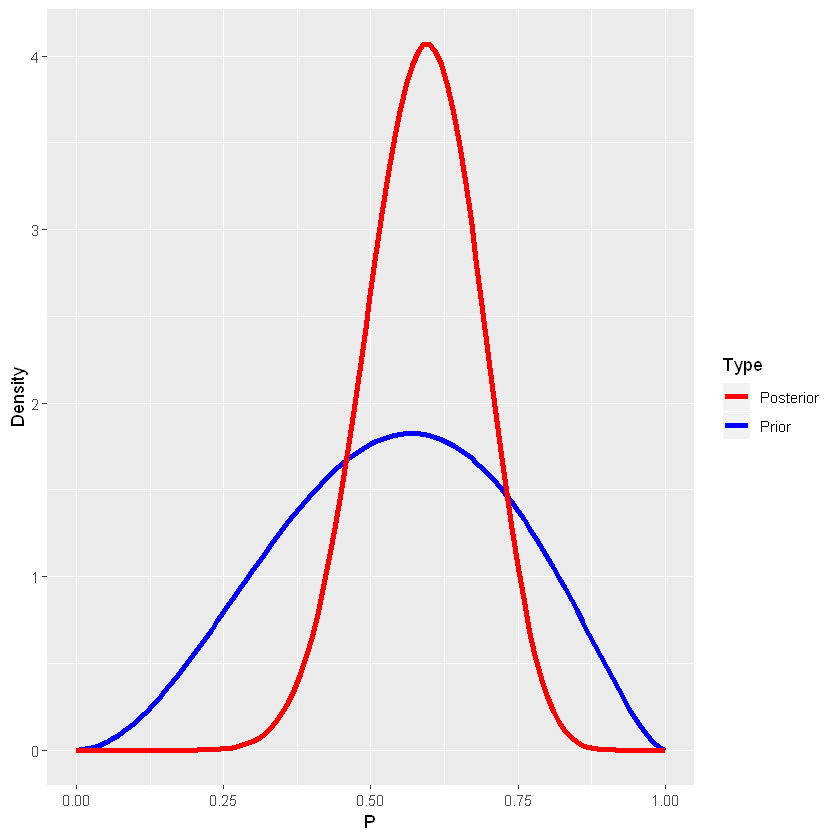

In [15]:
prior <- c(3.06, 2.56)
posterior <- prior + c(12, 20-12)

beta_prior_post(prior, posterior)

## Bayesian 가설 검정

### Data model : Binomial
### Prior : Beta

### `목표` : Posterior를 구했다면 가설 검정을 해보자

* Exact Solution

* Monte Carlo Simulation

모비율이 75%는 넘는다고 주장한다면, 이를 믿을만한가?

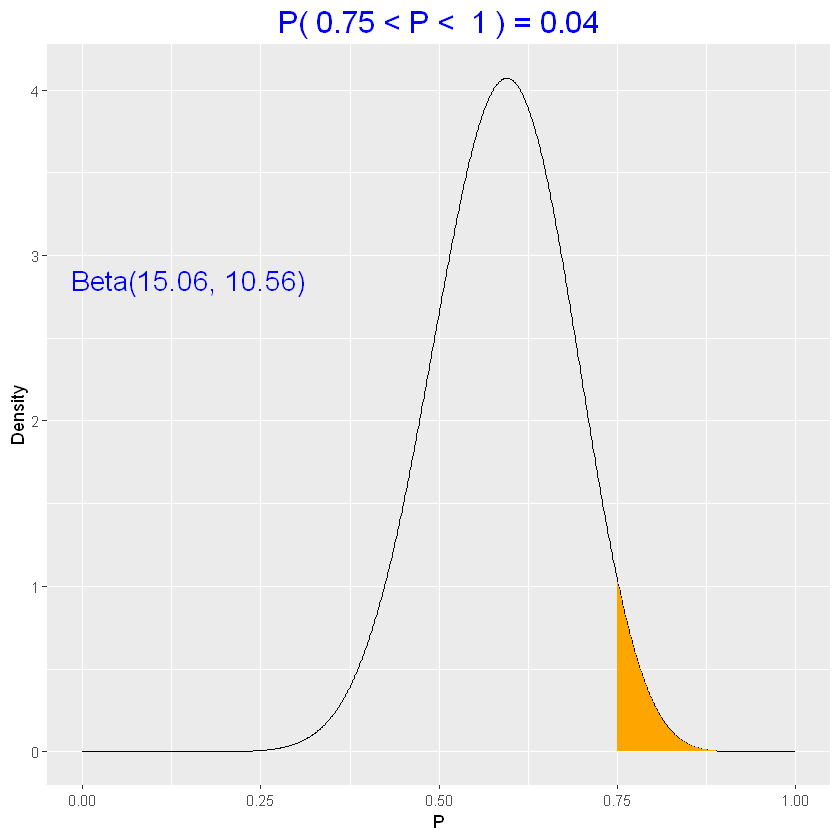

In [16]:
beta_area(lo=0.75, hi=1.0, shape_par=c(15.06, 10.56))

In [17]:
set.seed(123)
S = 1000 # simulation 횟수
BetaSamples = rbeta(S, 15.06, 10.56) # random samples under posterior distn
sum(BetaSamples>0.75)/S

[1] 0.037

## Bayesian Credible Interval

### Data model : Binomial
### Prior : Beta

### `목표` : Posterior를 구했다면 Credible Interval을 구해보자

> $\operatorname{Pr}(p \in \text{CI} | Y=y) = 0.90$

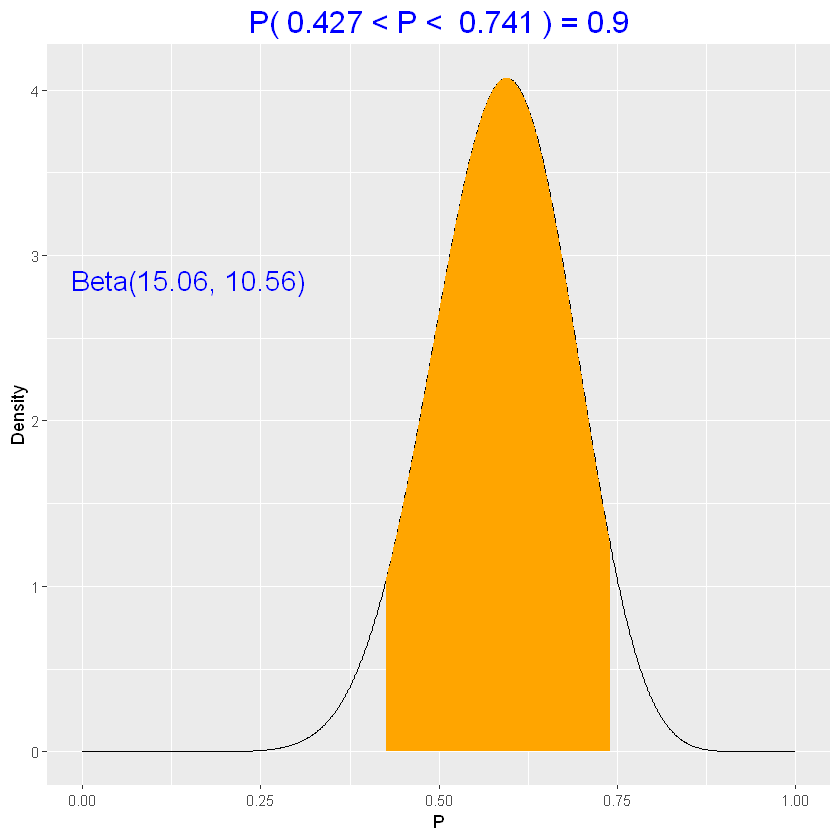

In [19]:
beta_interval(0.9, c(15.06, 10.56))

## Bayesian Prediction

### Data model : Binomial
### Prior : beta

### `목표` : 위의 setting에서 $\tilde{Y}|Y=y$ predictive distribution을 Monte Carlo Approximate해보자

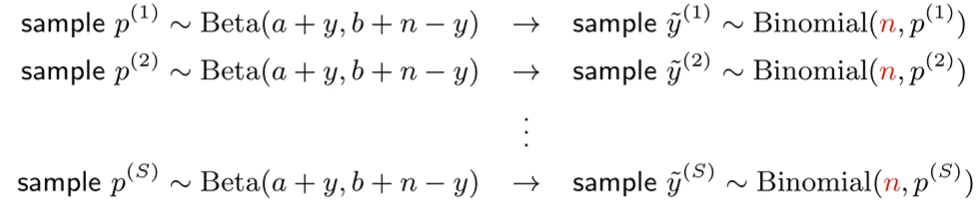

In [2]:
S = 100000 # simulation 횟수
a <- 3.06; b <- 2.56 # prior distn
n <- 20; y <- 12 # data
m <- 20 # predictive distribution

In [3]:
set.seed(123)
pred_p_sim <- rbeta(S, a + y, b + n - y) # p의 posterior distribution
pred_y_sim <- rbinom(S, m, pred_p_sim) # p의 predictive distribution

In [4]:
sum(pred_y_sim >= 5 & pred_y_sim <= 15)/ S

[1] 0.89807

In [5]:
#install.packages('extraDistr')
library(extraDistr)
dbbinom(0:20, m, a + y, b + n - y)

Warning message:
"package 'extraDistr' was built under R version 3.6.1"

[1] 7.352742e-06 7.492036e-05 4.002311e-04 1.486490e-03 4.295765e-03
 [6] 1.025068e-02 2.093125e-02 3.742038e-02 5.946041e-02 8.479636e-02
[11] 1.091547e-01 1.271341e-01 1.338812e-01 1.269608e-01 1.075640e-01
[16] 8.035500e-02 5.184305e-02 2.794109e-02 1.188683e-02 3.578388e-03
[21] 5.770828e-04

In [6]:
library(dplyr)
df_pbt <- data.frame(mcsample = pred_y_sim) %>% group_by(mcsample) %>% summarise(distn = n() / length(pred_y_sim))
df_pbt


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



mcsample,distn
0,0.00001
1,0.00010
2,0.00059
3,0.00153
4,0.00404
5,0.01051
6,0.02014
7,0.03740
8,0.06007
9,0.08531


`rename` : mcsample $\rightarrow$ tilde_y

In [7]:
df_pbt2 <- df_pbt %>% rename(tilde_y = mcsample) %>% mutate(kind = 'simulate')

**tidy**하게 만드는 중...!!

In [8]:
df_pbt2

tilde_y,distn,kind
0,0.00001,simulate
1,0.00010,simulate
2,0.00059,simulate
3,0.00153,simulate
4,0.00404,simulate
5,0.01051,simulate
6,0.02014,simulate
7,0.03740,simulate
8,0.06007,simulate
9,0.08531,simulate


In [9]:
data.frame(tilde_y = df_pbt2$tilde_y, distn = dbbinom(0:20, m, a + y, b + n - y), kind = rep('true', 21))

tilde_y,distn,kind
0,7.352742e-06,true
1,7.492036e-05,true
2,4.002311e-04,true
3,1.486490e-03,true
4,4.295765e-03,true
5,1.025068e-02,true
6,2.093125e-02,true
7,3.742038e-02,true
8,5.946041e-02,true
9,8.479636e-02,true


In [10]:
true_pbt <- data.frame(tilde_y = df_pbt2$tilde_y, distn = dbbinom(0:20, m, a + y, b + n - y), kind = rep('exact', 21))
true_pbt

tilde_y,distn,kind
0,7.352742e-06,exact
1,7.492036e-05,exact
2,4.002311e-04,exact
3,1.486490e-03,exact
4,4.295765e-03,exact
5,1.025068e-02,exact
6,2.093125e-02,exact
7,3.742038e-02,exact
8,5.946041e-02,exact
9,8.479636e-02,exact


In [33]:
levels(df_pbt3$tilde_y) = 

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19" "20"

In [34]:
df_pbt3 <- rbind(df_pbt2, true_pbt)

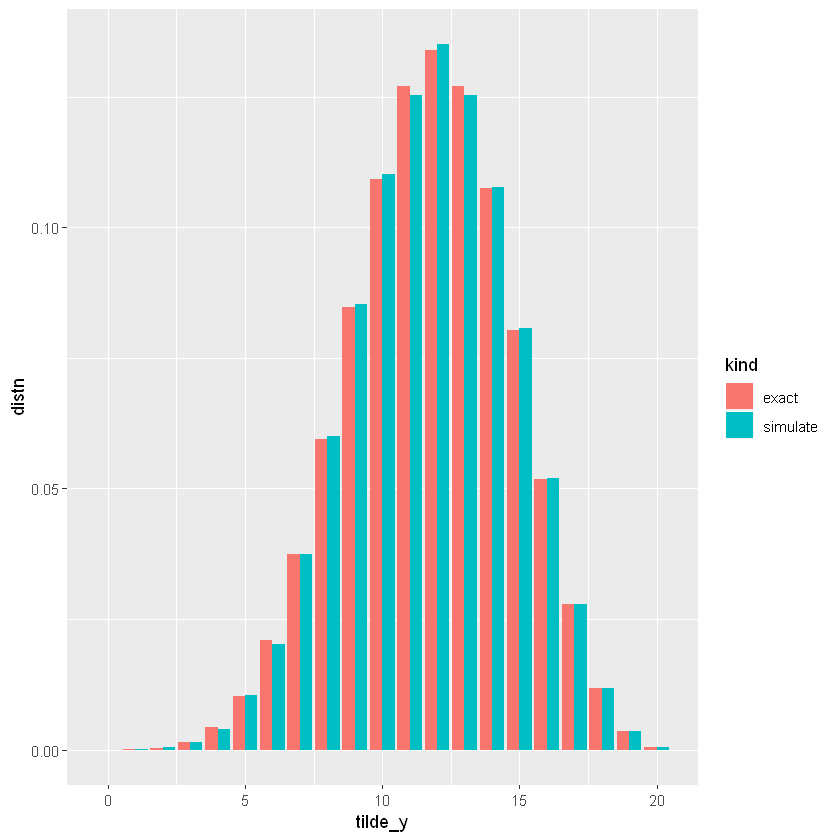

In [35]:
library(ggplot2)
ggplot(df_pbt3, aes(x = tilde_y, y = distn, fill = kind)) + geom_bar(stat = 'identity', position = 'dodge')

## posterior predictive checking

과연 우리의 데이터 모델이 맞을까? posterior는 우리에게 어떤 모델 옳은 것인 지는 안말해준다.

* Rubin은

  > $X_{\text{obs}} $가 주어졌을 때, 우리가 기대하는 것은 model specification이 적절하다면, $X_{\text{obs}}$와 같은 모집단의 샘플들과 어느정도 비슷한 데이터 셋이 복제될 것이다. 

그리고  **비슷한** 이라는 말을 하려면 검정통계량 $T(X)$를 정의해야한다.

이에 관한 더 많은 정보는 아래를 읽으시면 될 듯하다. (어려워서 not cover)

http://www.stat.columbia.edu/~gelman/research/published/A6n41.pdf

우리의 관측된 데이터 $y_\text{obs}= 12$

$T(Y) = Y$라 한 뒤에 Bayesian p-value를 Prior와 $Y_\text{obs} = 12$로 주어졌을 때

$\operatorname{Pr}(T(\tilde Y) > T(y_\text{obs}))$ 와 $\operatorname{Pr}(T(\tilde Y) < T(y_\text{obs}))$ 중에서 최소라 하자.

즉, 둘 다 낮으면 안된다고 하자.

In [47]:
df_pbt3 %>% filter(kind=='simulate') %>% 
    mutate(test_kind = ifelse(tilde_y <= 12, 'smaller', 'larger')) %>%
    group_by(test_kind) %>%
    summarise(sum(distn))

test_kind,sum(distn)
larger,0.40954
smaller,0.59046


p-value > 0.05

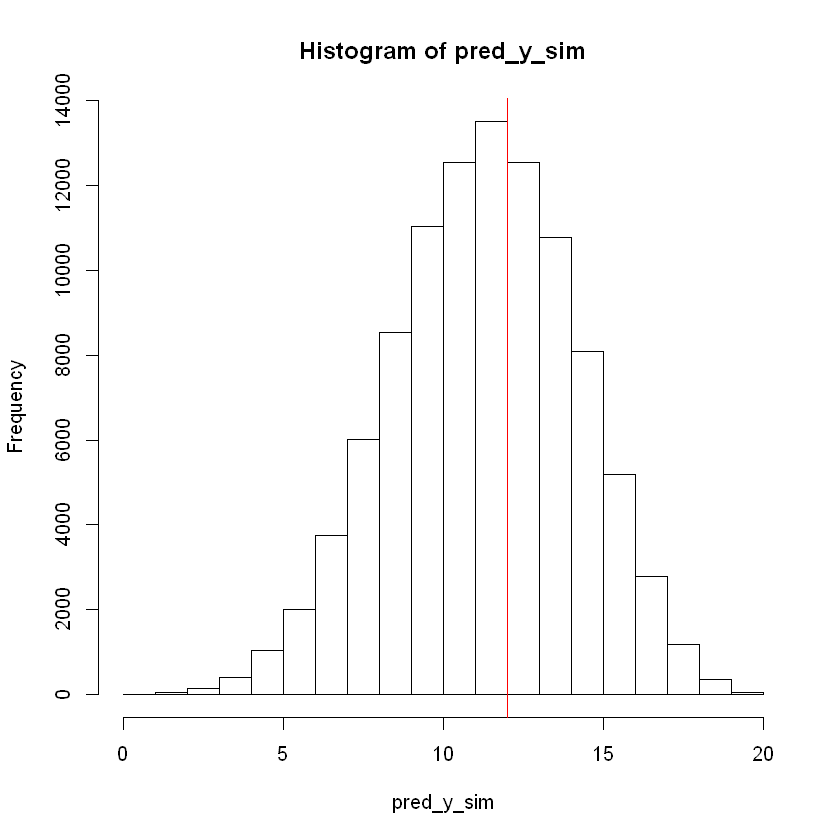

In [48]:
hist(pred_y_sim)
abline(v=y, col='red')

## Lab 1: Mixture of Beta Prior

### Data model : Binomial
### Prior : beta(s)

### Data : n = 43, y = 15

(a)
> 사전분포 Beta(2, 8) for $p$, likelihood function, 사후분포 그리기 
>
> 사전 분포의 평균, 데이터의 표본 비율, 사후 분포의 평균을 구하라.

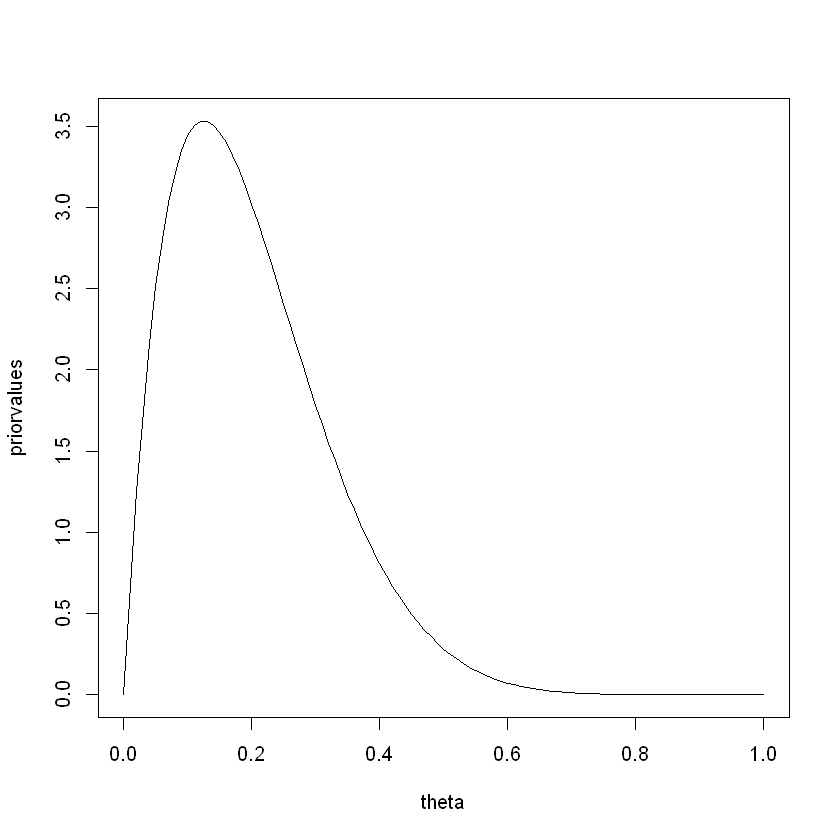

In [39]:
n = 43
y = 15
a = 2
b = 8
theta = seq(0, 1, by=0.01)
priorvalues = dbeta(theta, a, b)
plot(theta, priorvalues, type='l')

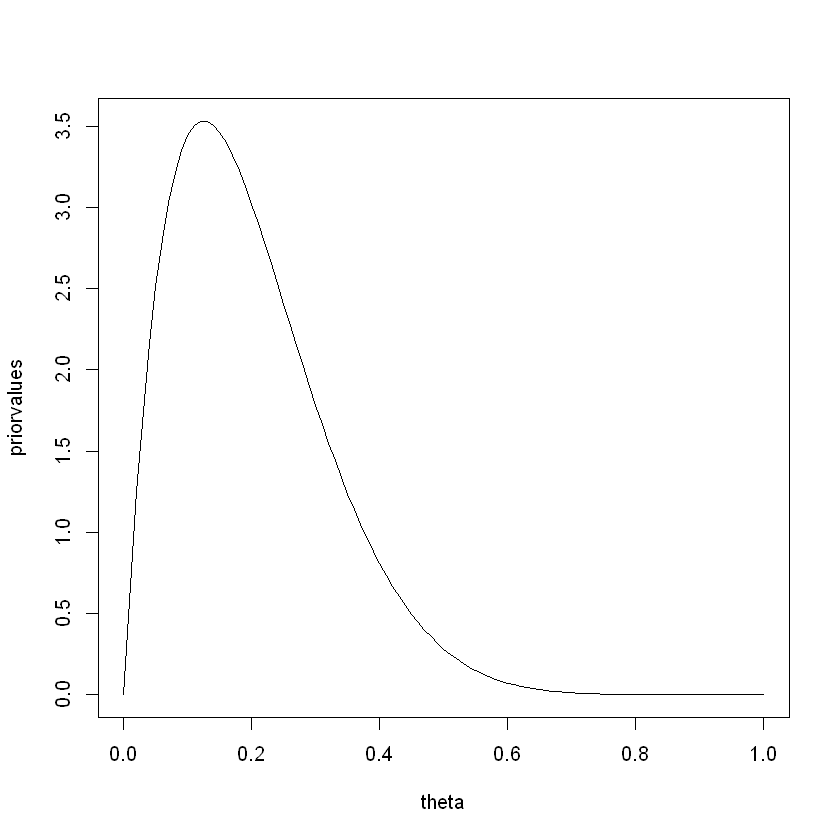

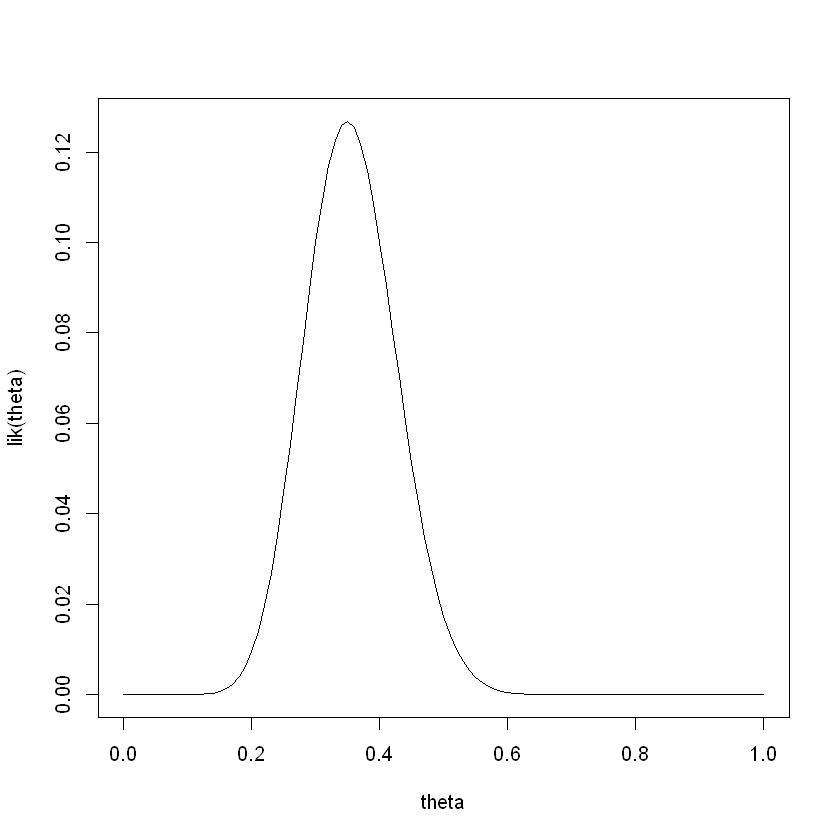

In [40]:
lik <- function(theta){
    choose(n, y) * (theta^y) * ((1 - theta)^(n - y))
}
plot(theta, lik(theta), type='l')

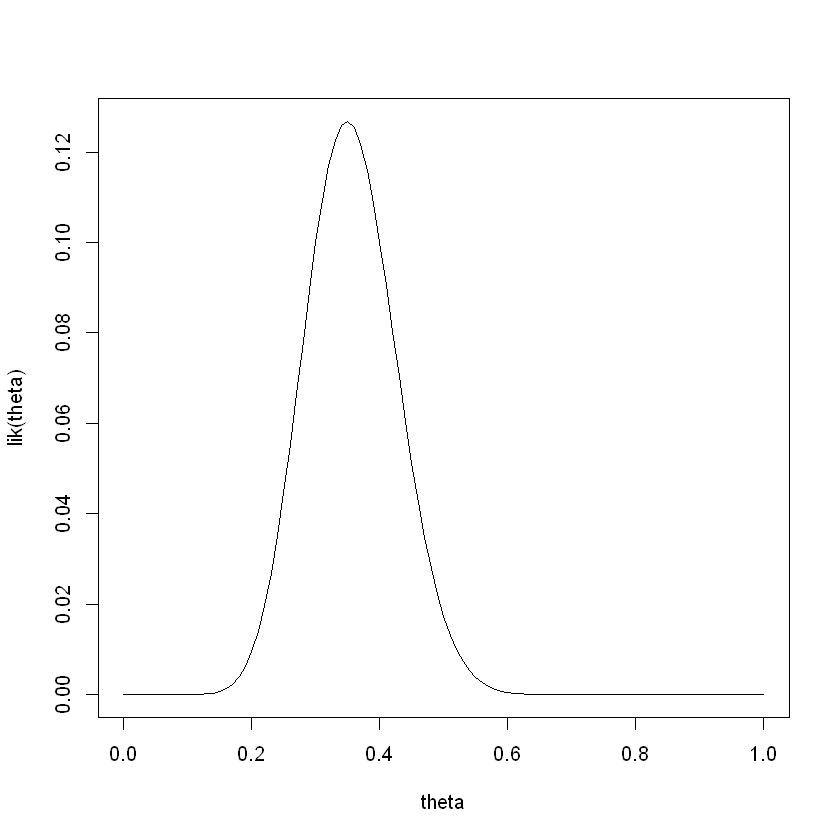

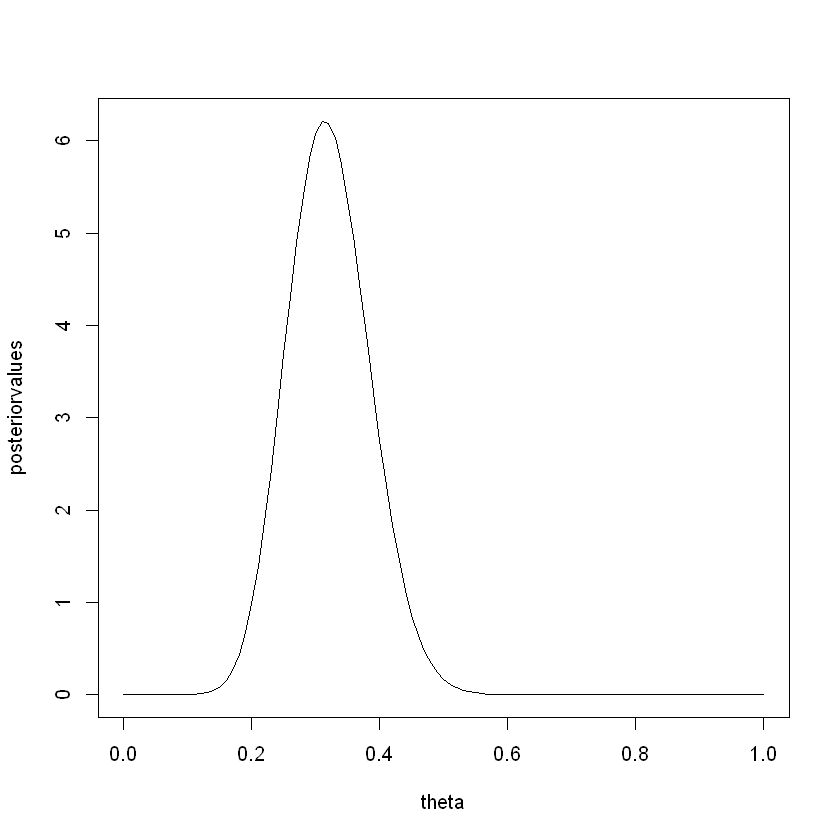

In [41]:
posteriorvalues = dbeta(theta, 2+15, 8+43-15)
plot(theta, posteriorvalues, type='l')

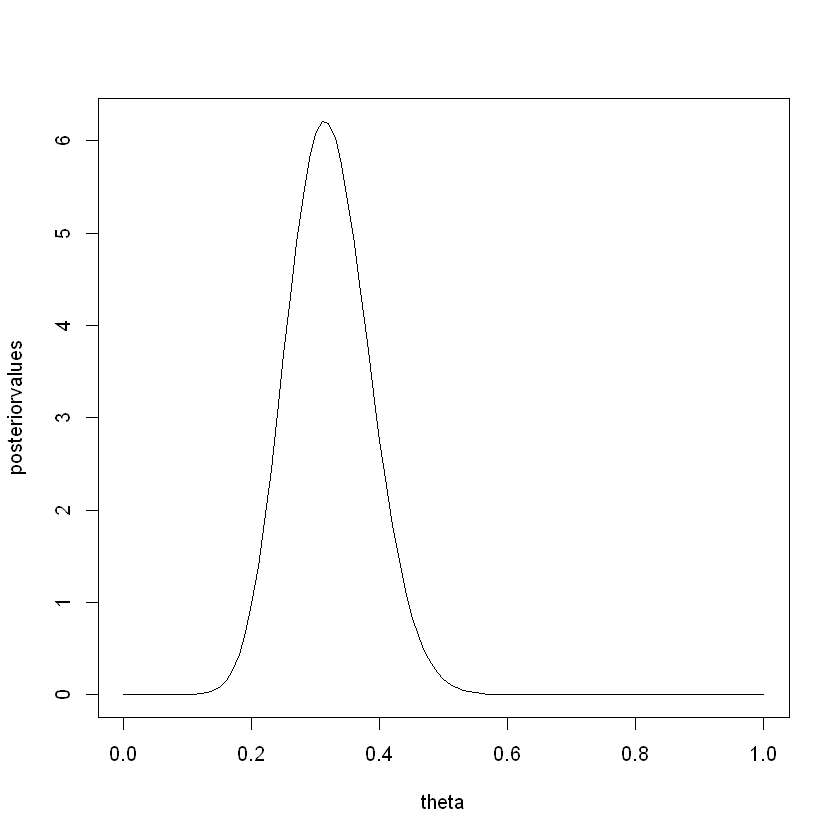

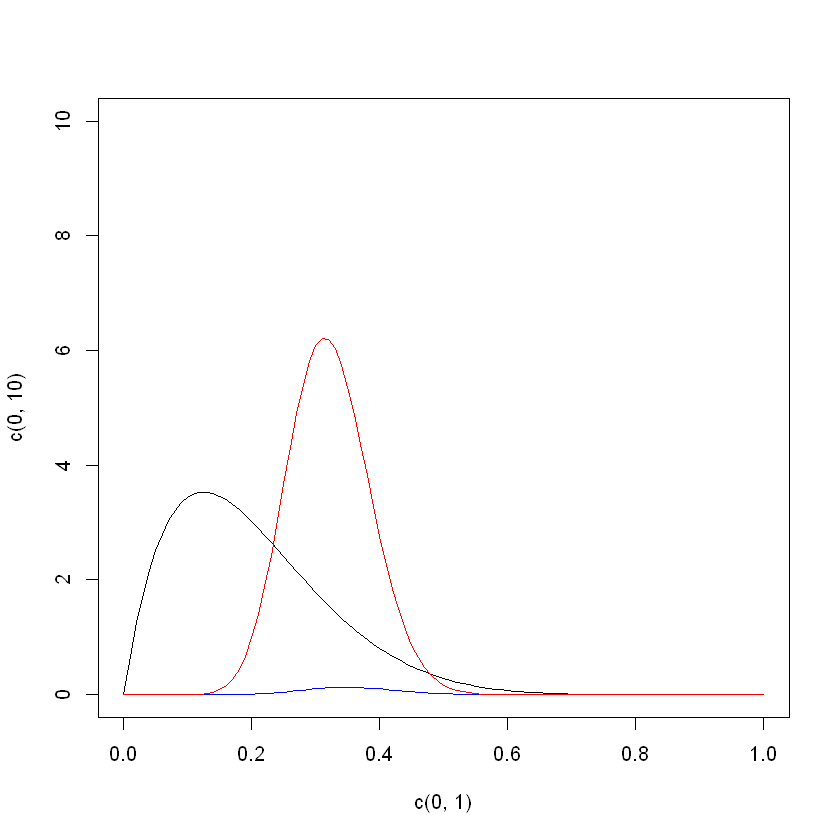

In [42]:
plot(c(0,1), c(0,10), type='n')
points(theta, priorvalues, type='l')
points(theta, lik(theta), type='l', col='blue')
abline()
points(theta, posteriorvalues, type='l', col='red')

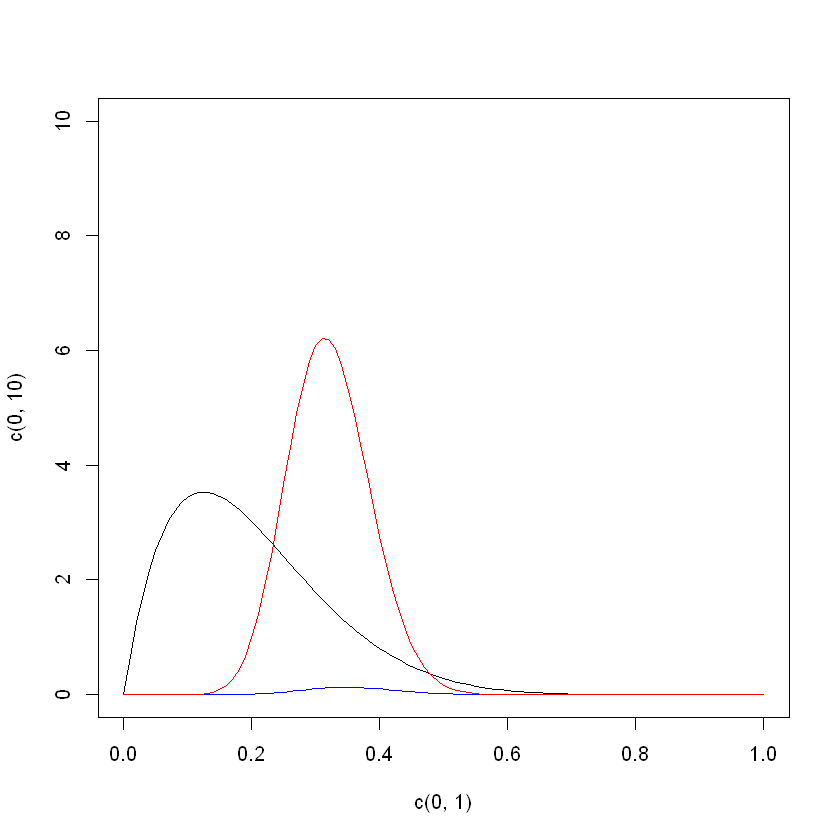

In [46]:
list(prior_mean=a/(a+b), sample_mean=y/n, posterior_mean=(a+y)/(a+b+n))

$prior_mean
[1] 0.2

$sample_mean
[1] 0.3488372

$posterior_mean
[1] 0.3207547

(b)
> 사전분포 Beta(8, 2) for $\theta$, likelihood function, 사후분포 그리기 
>
> 사전 분포의 평균, 데이터의 표본 비율, 사후 분포의 평균을 구하라.

(c)
> 75 – 25% mixture of Beta(2, 8) and Beta(8, 2)를 그리기
>
> 어떤 상황에서 이러한 Prior가 어울리는 지 생각해보기!

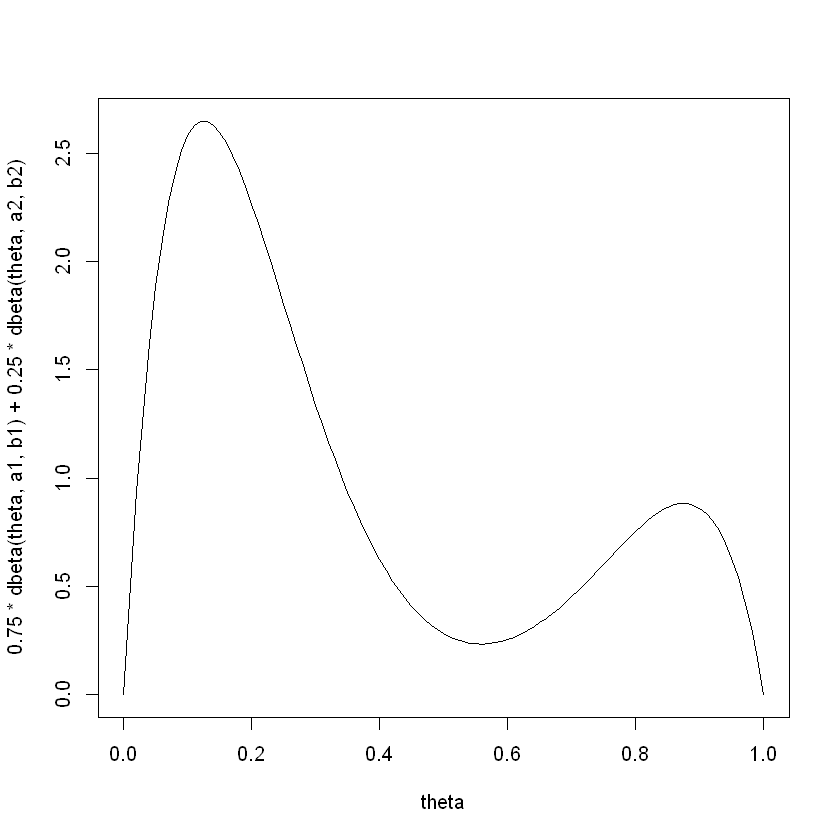

In [48]:
a1 = 2
b1 = 8
a2=8
b2 = 2

theta = seq(0, 1, by=0.01)
plot(x=theta, y=0.75*dbeta(theta, a1, b1) + 0.25*dbeta(theta, a2, b2), type='l')

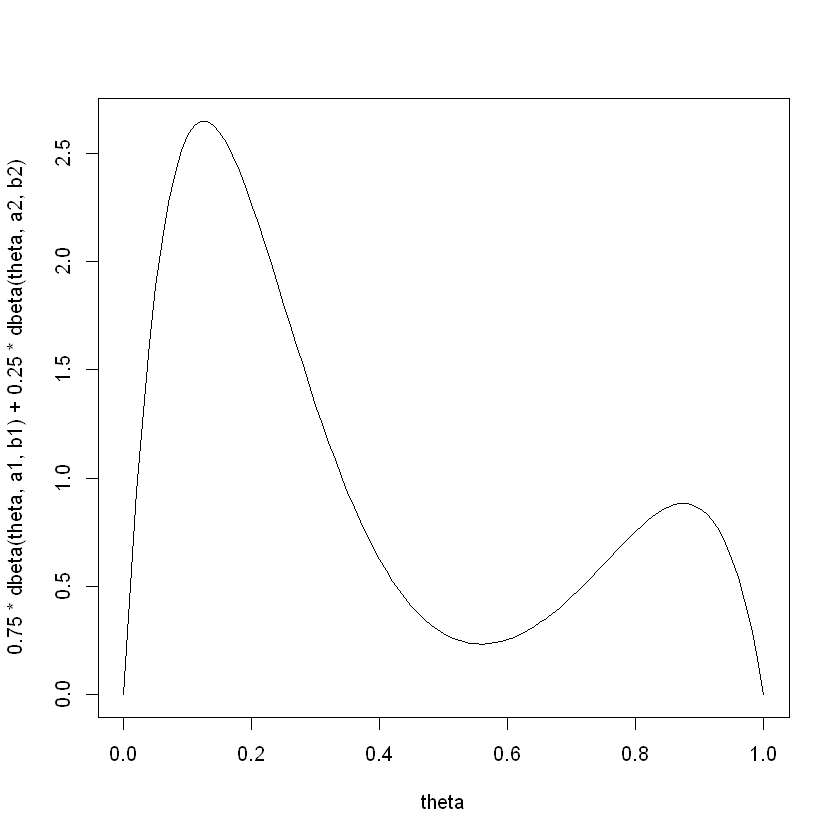